# Introduction

Below is the dataset that contains medical records of some people with or without cardiovascular disease. <br>
It contains the following contents:
1. **Exploratory Data Analysis** to explore the nature of the dataset
2. **Train, Validate and Develop a Machine Learning pipeline using PyCaret**, an ML model is constructed to predict patient cardiovascular health with pivotal data from the human body such as blood presure, chest pain, cholesterol etc. 


In [22]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('Datasets MLOPS/Datasets/02_medical_records.csv')
data

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,cv_issue
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [28]:
data.ST_slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_slope, dtype: int64

In [2]:
data.columns

Index(['age', 'gender', 'chest_pain', 'resting_BP', 'cholesterol',
       'fasting_BS', 'resting_ECG', 'max_HR', 'exercise_angina', 'old_peak',
       'ST_slope', 'cv_issue'],
      dtype='object')

# Exploratory Data Analysis 

In [3]:
data['cv_issue'].value_counts() # The dataset is quite balanced

1    508
0    410
Name: cv_issue, dtype: int64

In [4]:
data.describe() 

,age,resting_BP,cholesterol,fasting_BS,max_HR,old_peak,cv_issue
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='age', ylabel='Count'>

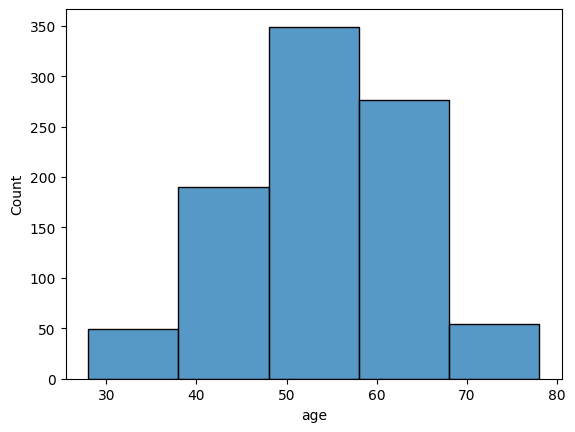

In [5]:
sns.histplot(data, x="age", binwidth=10) 

> Most medical records contain people from age 50 to 60, this could denote the target audience the model is catering to more towards. 

<Axes: xlabel='max_HR', ylabel='cholesterol'>

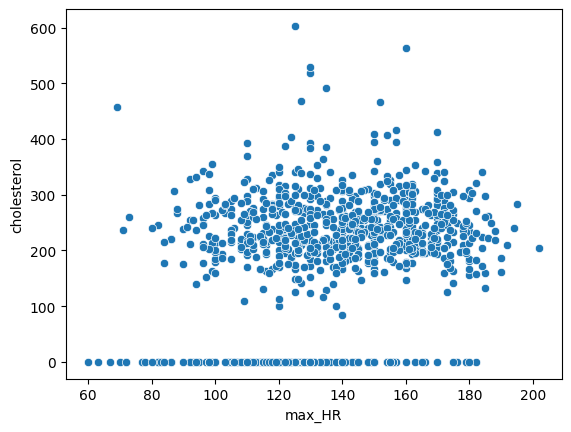

In [6]:
sns.scatterplot(data=data, x="max_HR", y="cholesterol")

> There are quite a lot of outliers that will preprocessed at the later stage, patients cholesterol level is situated near the 150 to 350 range with a spread of variation of their maximum heart rate. Normal cholesterol level below 200mg/dL, looking at the 200 border, more are above 200 which infers that more people in this dataset has cardiovascular issue which is true from the counts of "cv_issue".

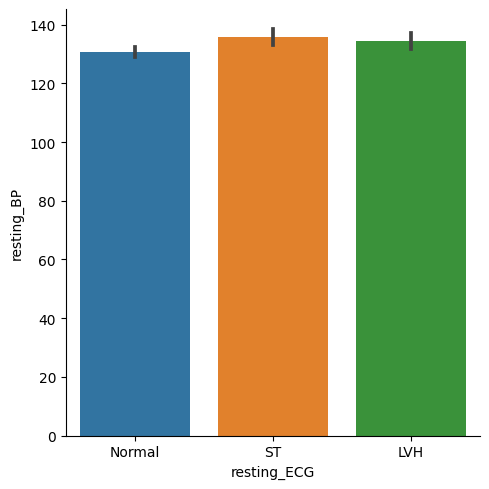

In [7]:
sns.catplot(
 data=data, x="resting_ECG", y="resting_BP",
 kind="bar"
)

> People with resting electrocardiogram results of ST has the highest resting blood pressure, follwed by LVH. It can be inferred to the increase of serverity of resting electrocardiogram is not necessarily directly propotional to resting blood pressure, at a certain point of severity like ST will the blood pressure might start to decrease if resting electrocardiogram worsens.

# Train, Validate and Develop a Machine Learning pipeline using PyCaret

### Preprocessing and Training Process

1. The "target" is the predicting variable of 'cv_issue' <br><br> 
2. The categorical features are passed with 'gender', 'chest_pain', 'exercise_angina', 'ST_slope' <br><br>
3. The ordinal features of resting_ECG has the level of intensity of resting electrocardiogram results in increasing level from 'Normal', 'LVH' to 'ST' <br><br> 
4. "remove_outliers" is set to true to drop outliers from the training data using an Isolation Forest <br><br>
5. "normalize" is set to true in order to rescale the values of numeric columns in the dataset without affecting the ranges of values or information loss. <br><br>
6. "transformation" is set to true to ensure that this parameter stabilizes the variance and minimize skewness for the data <br><br>
7. "bin_numeric_features" is use to turn continuous variables into categorical values using pre-defined number of bins by improveing the accuracy of predictive models by reducing noise or non-linearity in the dataset. The reason only "age" is passed because the other numerical variables decreases the accuracy for the best model trained and its important to gives the context for different age groups. <br><br>
8. "log_experiment", "log_plots" are set to true with the experiment name to track the model registration for the training process <br><br>

In [11]:
from pycaret.classification  import *
s = setup(data, 
          target='cv_issue',  
          session_id=123,     
          categorical_features=['gender', 'chest_pain', 'exercise_angina', 'ST_slope'],
          ordinal_features = {'resting_ECG' : ['Normal', 'LVH', 'ST']},
          remove_outliers=True,  
          normalize=True,      
          transformation=True,  
          bin_numeric_features = ['age'],
          log_experiment = True,
          log_plots = True,
          experiment_name = 'cardio_MLops'
          )

,Description,Value
0,Session id,123
1,Target,cv_issue
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(885, 17)"
5,Transformed train set shape,"(609, 17)"
6,Transformed test set shape,"(276, 17)"
7,Ordinal features,3
8,Numeric features,6
9,Categorical features,4


2023/08/19 16:16:32 INFO mlflow.tracking.fluent: Experiment with name 'cardio_MLops' does not exist. Creating a new experiment.


In [12]:
s.dataset_transformed

,age,gender,chest_pain_ATA,chest_pain_ASY,chest_pain_NAP,chest_pain_TA,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope_Up,ST_slope_Down,ST_slope_Flat,cv_issue
0,-1.847603,0.503077,2.018663,-1.113091,-0.538752,-0.15891,0.542292,0.789420,-0.523506,-0.794361,1.415427,-0.851594,-0.829785,1.139348,-0.243168,-1.018229,0
462,0.916737,0.503077,-0.495377,0.898400,-0.538752,-0.15891,-0.536062,0.375671,-0.523506,-0.794361,-0.837001,1.174268,0.572917,-0.877695,4.112392,-1.018229,1
853,-0.914571,0.503077,-0.495377,-1.113091,1.856140,-0.15891,0.431487,0.555681,-0.523506,1.045321,0.741457,-0.851594,-0.829785,1.139348,-0.243168,-1.018229,0
540,0.916737,0.503077,-0.495377,-1.113091,1.856140,-0.15891,0.431487,0.151944,-0.523506,1.455334,-0.640221,1.174268,0.483732,-0.877695,-0.243168,0.982098,1
162,-0.914571,0.503077,2.018663,-1.113091,-0.538752,-0.15891,1.549450,0.600027,-0.523506,-0.794361,1.500652,-0.851594,-0.829785,1.139348,-0.243168,-1.018229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.005304,0.503077,-0.495377,0.898400,-0.538752,-0.15891,1.994332,1.476002,-0.523506,1.455334,-0.640221,1.174268,1.145730,-0.877695,-0.243168,0.982098,1
486,0.005304,0.503077,2.018663,-1.113091,-0.538752,-0.15891,-1.375211,0.229921,1.910198,1.455334,1.757587,-0.851594,-0.326789,1.139348,-0.243168,-1.018229,0
859,0.005304,-1.987767,-0.495377,-1.113091,1.856140,-0.15891,0.542292,0.925177,-0.523506,1.045321,0.163768,-0.851594,0.745203,1.139348,-0.243168,-1.018229,0
334,0.005304,0.503077,-0.495377,0.898400,-0.538752,-0.15891,-0.033216,-1.942789,1.910198,-0.794361,1.330414,-0.851594,-1.964589,1.139348,-0.243168,-1.018229,1


In [13]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000")
tracking_uri = mlflow.get_tracking_uri()
print("Current tracking uri: {}".format(tracking_uri))
best = compare_models()

Current tracking uri: http://127.0.0.1:5000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8817,0.9263,0.9043,0.8873,0.8945,0.7598,0.7624,3.2860
lr,Logistic Regression,0.8660,0.9250,0.8957,0.8695,0.8812,0.7277,0.7308,3.7720
rf,Random Forest Classifier,0.8660,0.9133,0.8870,0.8756,0.8797,0.7284,0.7318,2.8910
gbc,Gradient Boosting Classifier,0.8613,0.9152,0.8871,0.8692,0.8764,0.7185,0.7221,2.6910
ridge,Ridge Classifier,0.8598,0.0000,0.9013,0.8561,0.8769,0.7144,0.7183,2.5000
lda,Linear Discriminant Analysis,0.8598,0.9247,0.9013,0.8561,0.8769,0.7144,0.7183,2.2850
lightgbm,Light Gradient Boosting Machine,0.8520,0.9070,0.8732,0.8634,0.8671,0.7002,0.7028,3.1210
ada,Ada Boost Classifier,0.8474,0.8928,0.8762,0.8546,0.8643,0.6901,0.6925,2.9300
et,Extra Trees Classifier,0.8457,0.9125,0.8673,0.8574,0.8616,0.6874,0.6889,3.7770
nb,Naive Bayes,0.8443,0.8986,0.8621,0.8602,0.8596,0.6847,0.6874,2.5110


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

> Multiple different types of model are trained with 10 k-fold cross-validation to find the best model: **CatBoostClassifier** 

### Performance of CatBoostClassifier

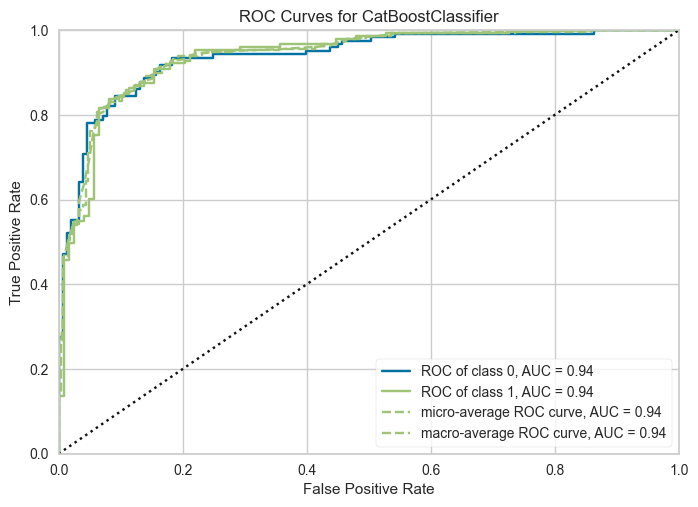

In [14]:
# The Actual to Predicted Rate for both are quite high and similar for both cv_issue of 0 and 1
plot_model(best)

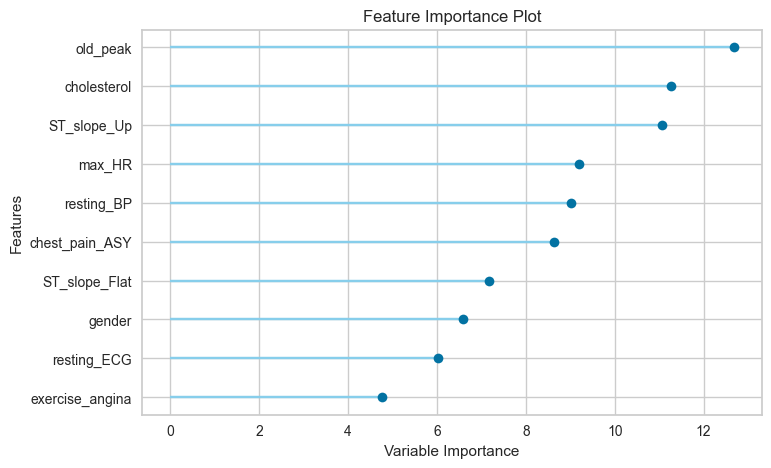

In [15]:
# old_peak and cholesterol has the top 2 best importance in relation to cv_issue
plot_model(best, plot = 'feature')

### Saving of pipeline

In [16]:
save_model(best, 'model_classifier_cardio')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\yapdo\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'resting_BP', 'cholesterol',
                                              'fasting_BS', 'max_HR',
                                              'old_peak'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               ver...
                 ('transformation',
                  Tran

### Model Registration to MLFlow

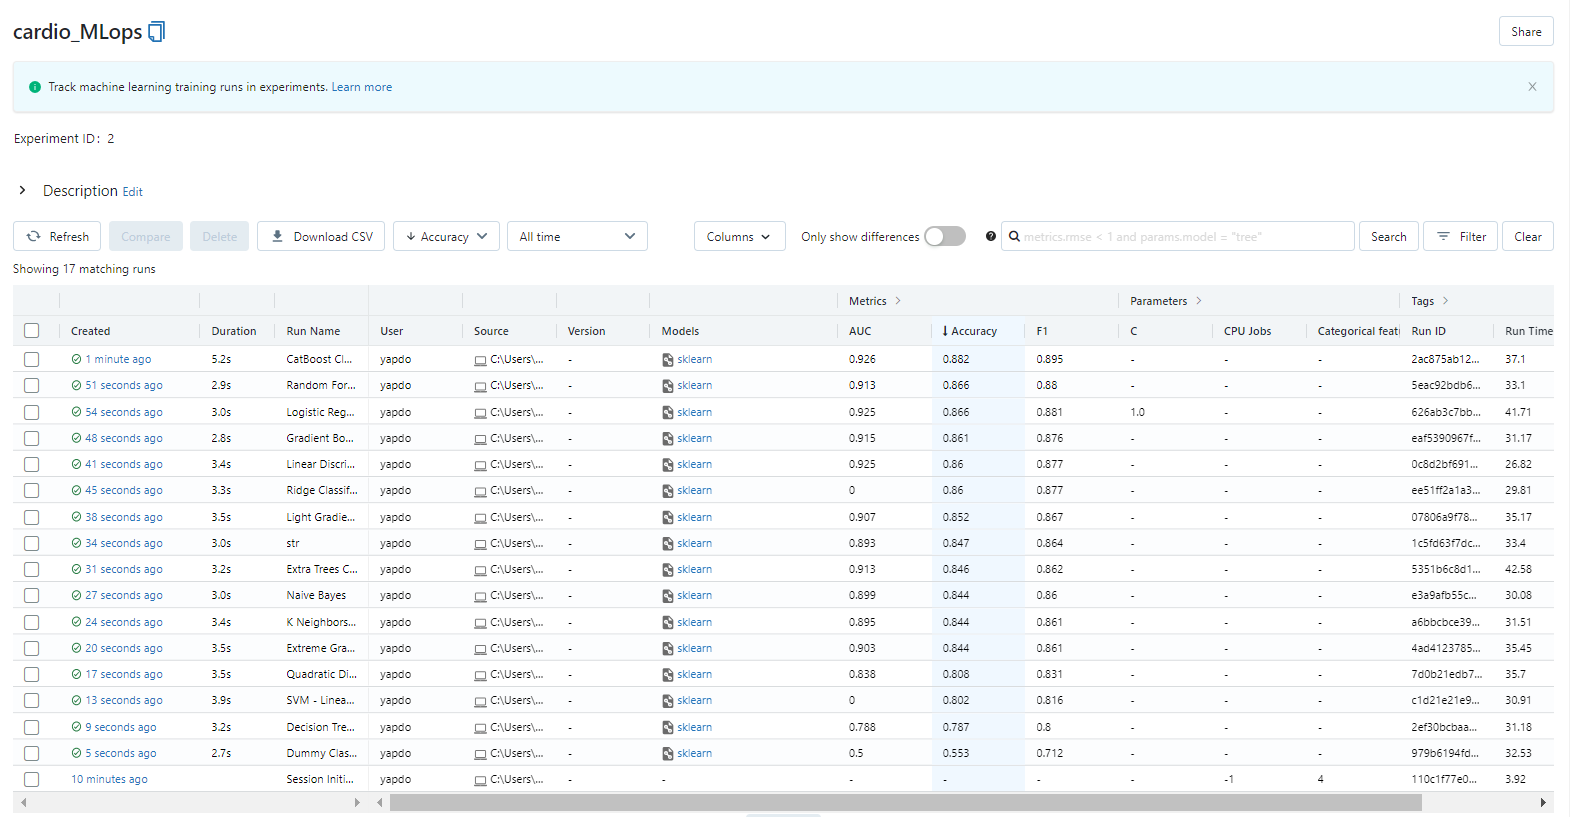 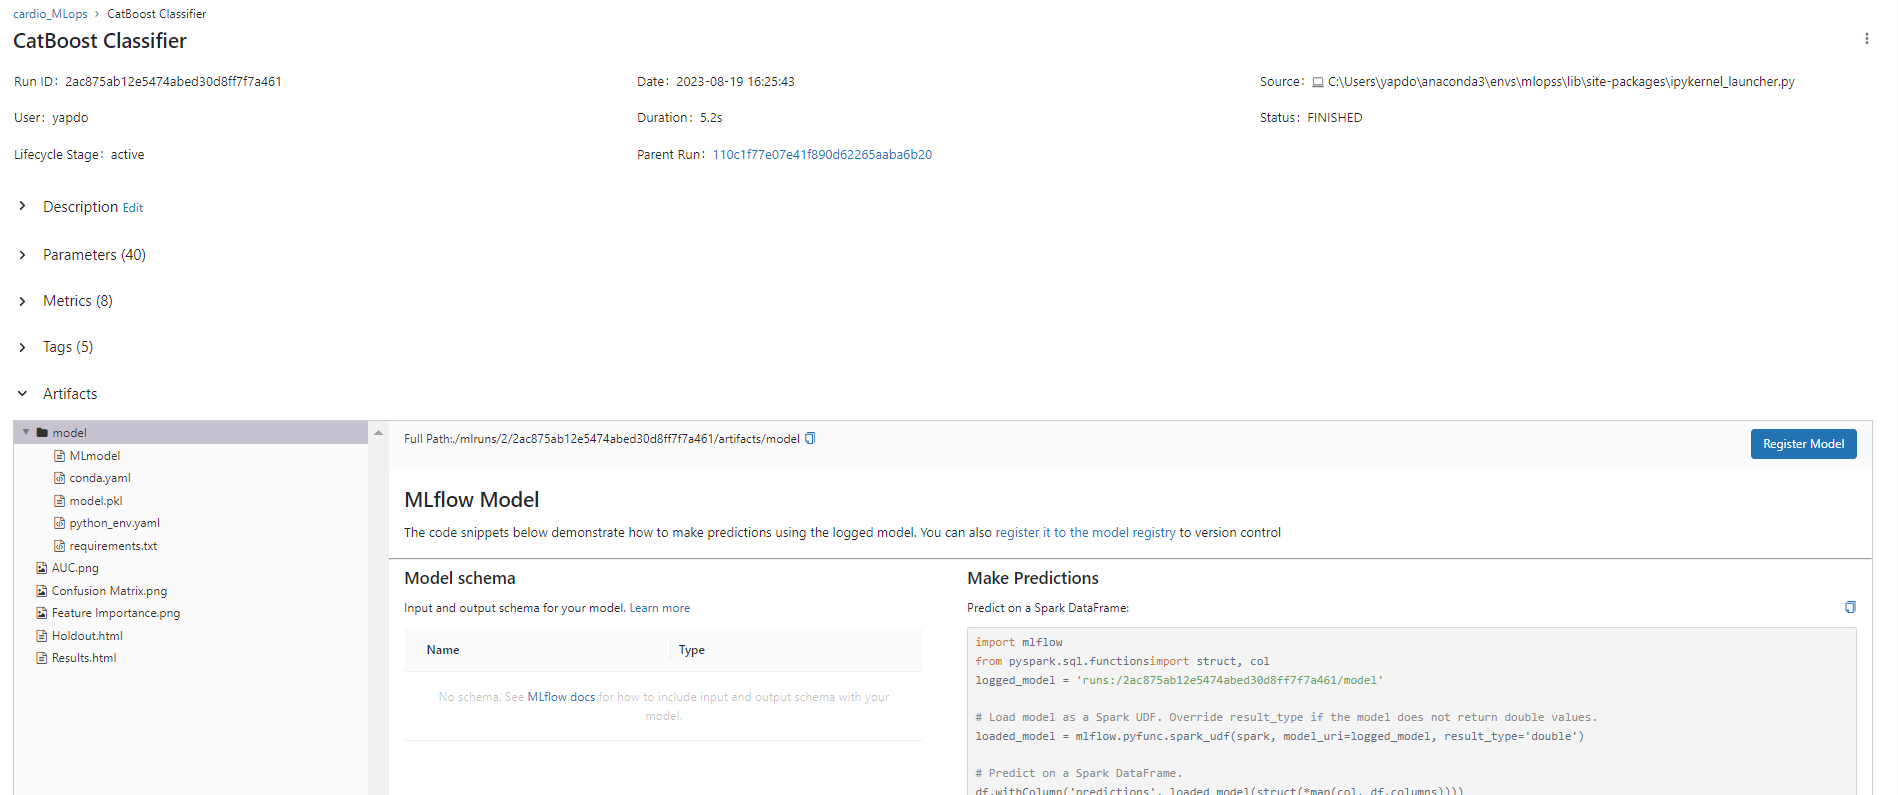 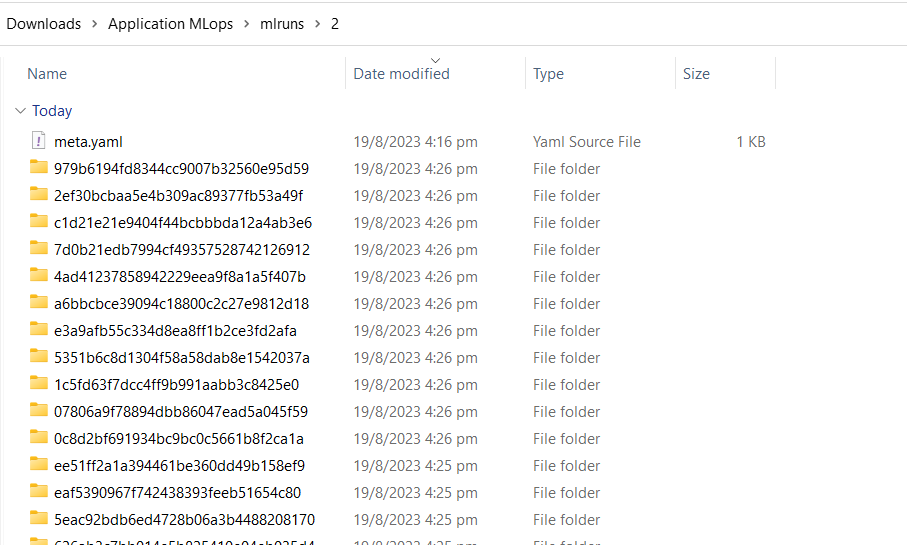

> The models run are all logged into mlflow and stored locally after running, with the CatBoost Classifier registered to mlflow too.

### Loading model and Prediction on unseen data

In [17]:
model = load_model('model_classifier_cardio')
model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\yapdo\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'resting_BP', 'cholesterol',
                                             'fasting_BS', 'max_HR',
                                             'old_peak'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              ver...
                ('transformation',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=PowerTransformer(copy=True,
                                                                 method='yeo-johnson',
                                                                 standardize=False))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x000001AE3B1E8B80>)],
         verbose=False)

In [18]:
data = {
    'age': [52, 42, 40, 56, 62],
    'gender': ['M', 'F', 'M', 'F', 'M'],
    'chest_pain': ['ATA', 'NAP', 'ATA', 'ASY', 'NAP'],
    'resting_BP': [139, 163, 132, 140, 148],
    'cholesterol': [276, 172, 280, 200, 190],
    'fasting_BS': [0, 0, 0, 0, 0],
    'resting_ECG': ['Normal', 'Normal', 'ST', 'Normal', 'Normal'],
    'max_HR': [172, 156, 98, 108, 122],
    'exercise_angina': ['N', 'N', 'N', 'Y', 'N'],
    'old_peak': [0.0, 1.0, 1.5, 1.5, 0.0],
    'ST_slope': ['Up', 'Flat', 'Up', 'Flat', 'Flat']
}

unseen = pd.DataFrame(data)

# generate predictions
from pycaret.classification import predict_model
predictions = predict_model(model, data=unseen)
predictions.head()

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,prediction_label,prediction_score
0,52,M,ATA,139,276,0,Normal,172,N,0.0,Up,0,0.9765
1,42,F,NAP,163,172,0,Normal,156,N,1.0,Flat,0,0.8480
2,40,M,ATA,132,280,0,ST,98,N,1.5,Up,0,0.7300
3,56,F,ASY,140,200,0,Normal,108,Y,1.5,Flat,1,0.8113
4,62,M,NAP,148,190,0,Normal,122,N,0.0,Flat,1,0.7421


> Using the above unseen data, <br>
Record 2 has a lower score than others for existing no cardiovascular issue as it could be due to its higher value of cholesterol.<br>
Record 4 has a lower score than others for existing cardiovascular issue because of the normal "resting_ECG" and no "exercise_angina" but logically it could be due to an older age.

In [19]:
# cd Downloads/Application MLops

# End of Section